In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import tensorflow as tf
import os, sys, time
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import utils, optimization, metrics, plot, data

from model import WGanModel, LapGanModel
from gan import GAN

# Parameters

In [5]:
ns = 64
nsamples = 4000
k = 10

# Data handling

Load the data

In [6]:
images, raw_images = data.load_samples(nsamples = nsamples, permute=True, k=k)
images = data.make_smaller_samples(images, ns)
raw_images = data.make_smaller_samples(raw_images, ns)   

Select 4000 samples out of 15000.


Let us plot 16 images

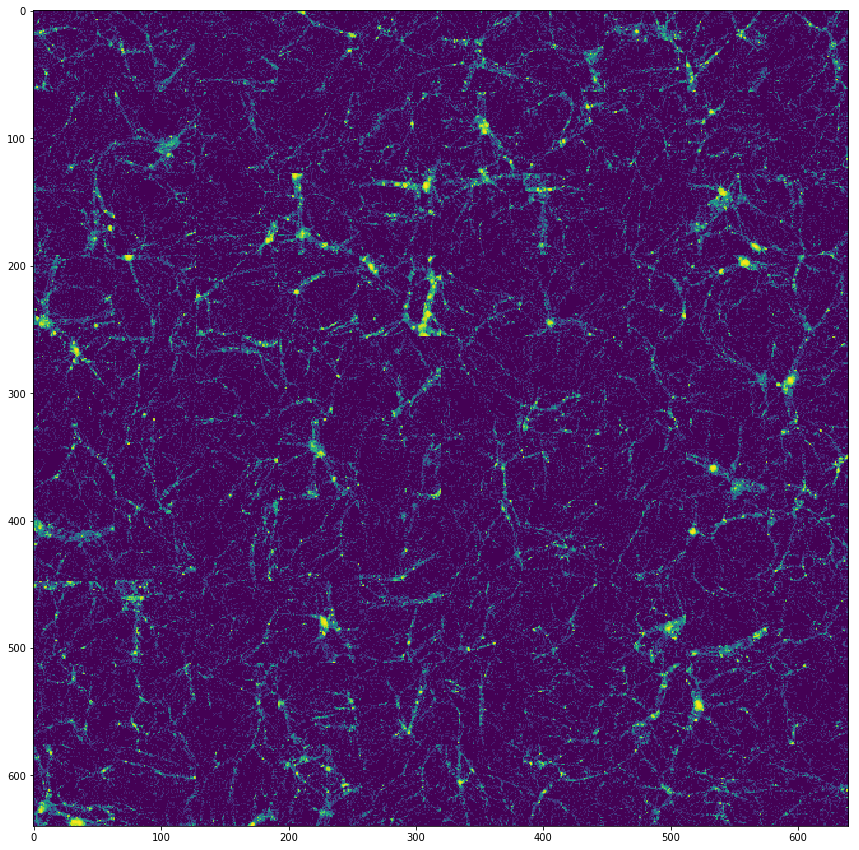

In [8]:
plt.figure(figsize=(15,15))
utils.draw_images(images,nx=10,ny=10,px=ns,py=ns)

# A) The WGAN

In [9]:
def current_time_str():
    import time, datetime
    d = datetime.datetime.fromtimestamp(time.time())
    return str(d.year)+ '_' + str(d.month)+ '_' + str(d.day)+ '_' + str(d.hour)+ '_' + str(d.minute)

time_str = current_time_str() 
global_path = '../../saved_result/'


## Parameters

In [13]:
bn = False

params_discriminator = dict()
params_discriminator['stride'] = [2, 2, 2, 2, 1]
params_discriminator['nfilter'] = [16, 64, 128,  256, 64]
params_discriminator['shape'] = [[5, 5],[5, 5], [3, 3], [3, 3], [3, 3]]
params_discriminator['batch_norm'] = [bn, bn, bn, bn, bn]
params_discriminator['full'] = [128]
params_discriminator['summary'] = True

params_generator = dict()
params_generator['stride'] = [2, 2, 2, 2, 1]
params_generator['latent_dim'] = 100
params_generator['nfilter'] = [64, 256, 128, 64, 1]
params_generator['shape'] = [[3, 3], [3, 3], [5, 5], [5, 5], [5, 5]]
params_generator['batch_norm'] = [bn, bn, bn, bn]
params_generator['full'] = [4*4*64]
params_generator['summary'] = True
params_generator['non_lin'] = 'tanh'

params_optimization = dict()
params_optimization['gamma_gp'] = 10
params_optimization['batch_size'] = 16
params_optimization['gen_optimizer'] = 'rmsprop' # rmsprop / adam / sgd
params_optimization['disc_optimizer'] = 'rmsprop' # rmsprop / adam /sgd
params_optimization['disc_learning_rate'] = 3e-5
params_optimization['gen_learning_rate'] = 3e-5
params_optimization['beta1'] = 0.0
params_optimization['beta2'] = 0.9
params_optimization['epsilon'] = 1e-8
params_optimization['epoch'] = 50



params = dict()
params['generator'] = params_generator
params['discriminator'] = params_discriminator
params['optimization'] = params_optimization

params['normalize'] = False
params['image_size'] = [ns, ns]
params['prior_distribution'] = 'gaussian'
params['sum_every'] = 200
params['viz_every'] = 200
params['save_every'] = 2000
params['name'] = 'WGAN{}'.format(ns)
params['summary_dir'] = global_path + params['name'] + '_' + time_str +'summary/'
params['save_dir'] = global_path + params['name'] + '_' + time_str + 'checkpoints/'

params['clip_max_real'] = False
params['log_clip'] = 0.1
params['sigma_smooth'] = 1
params['k'] = k





## Build the model

In [14]:
from model import WGanModel
from gan import GAN

wgan = GAN(params, WGanModel)

Generator 
------------------------------------------------------------
     The input is of size (?, 100)
     0 Full layer with 1024 outputs
         Size of the variables: (?, 1024)
     Reshape to (?, 4, 4, 64)
     1 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 8, 8, 64)
     2 Deconv layer with 256 channels
         Batch norm
         Size of the variables: (?, 16, 16, 256)
     3 Deconv layer with 128 channels
         Batch norm
         Size of the variables: (?, 32, 32, 128)
     4 Deconv layer with 64 channels
         Batch norm
         Size of the variables: (?, 64, 64, 64)
     5 Deconv layer with 1 channels
         Size of the variables: (?, 64, 64, 1)
    Non lienarity: tanh
     The output is of size (?, 64, 64, 1)
------------------------------------------------------------

Discriminator 
------------------------------------------------------------
     The input is of size (?, 64, 64, 1)
     0 Conv layer with 16 channels


## Train the model
Note that the input is the processed data... Maybe, we should change that

In [15]:
wgan.train(images)

Pool with 4 workers


Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*arg

KeyboardInterrupt: 